In [1]:
# Optimization for Machine Learning
# Problem: projected gradient descent for SVM

%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pegasos import *
from cyclic_coordinate_descent import *
from random_coordinate_descent import *
from utils import *


from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import StandardScaler
import os, struct
from array import array
from SMO import SMO
from RSMO import RSMO

np.random.seed(1337)

kwargs = {'linewidth' : 3.5}
font = {'weight' : 'normal', 'size'   : 24}
matplotlib.rc('font', **font)


### Load mnist training and validation images. Plot examples from both sets and show their corresponding labels as verification.

In [2]:
# mnist load images
train_imgs_dir = './dataset/mnist/train-images.idx3-ubyte'
train_labels_dir = './dataset/mnist/train-labels.idx1-ubyte'
val_imgs_dir = './dataset/mnist/t10k-images.idx3-ubyte'
val_labels_dir = './dataset/mnist/t10k-labels.idx1-ubyte'
train_imgs, train_labels = mnist_data_loader(train_imgs_dir, train_labels_dir)
print("mnist: number of training examples", train_imgs.shape[0])

val_imgs, val_labels = mnist_data_loader(val_imgs_dir, val_labels_dir)
print("mnist: number of validation examples", val_imgs.shape[0])
HEIGHT = 28
WIDTH = 28

# Reshape images to vectors
train_vectors = train_imgs.reshape(-1, HEIGHT * WIDTH)
val_vectors = val_imgs.reshape(-1, HEIGHT * WIDTH)

mnist: number of training examples 11769
mnist: number of validation examples 1932


## Plot Functions

In [3]:
# initialize w, lambda
num_examples, num_features = train_vectors.shape

def error_plot(w, _lambda, img_vectors, labels, algorithm, dilate=1, yscale='log'):
    """plot errors"""
    error_list = cal_objective_dilate(w, _lambda, img_vectors, labels, dilate)
    print(algorithm+" error:", error_list[-1])
    plt.xlabel('Step')
    plt.ylabel('Error')
#     plt.yscale(yscale)
    num_iters = len(error_list)
    plt.plot(np.linspace(0, num_iters*dilate, num=num_iters), error_list, **kwargs)

def cal_objective_dilate(w, _lambda, img_vectors, labels, dilate=1):
    num_iters = len(w)
    return [objective(x, _lambda, img_vectors, labels) \
                                for x in w[0:num_iters:dilate]]

def acc_plot(w, img_vectors, labels, algorithm, dilate=1):
    """plot accuracies"""
    acc_list = cal_acc_dilate(w, img_vectors, labels, dilate)
    print(algorithm+" acc:", acc_list[-1])
    plt.xlabel('Step')
    plt.ylabel('Acc')
    num_iters = len(acc_list)
    plt.plot(np.linspace(0, num_iters*dilate, num=num_iters), acc_list, **kwargs)

def cal_acc_dilate(w, img_vectors, labels, dilate=1):
    num_iters = len(w)
    return [compute_accuracy(x, img_vectors, labels) for x in w[0:num_iters:dilate]]

## Training error

In [4]:
def average_weight(w):
    w_sum = np.zeros([num_features,1])
    w_average = []
    for i in range(0,len(w)):
        w_sum += w[i]
        w_average.append(w_sum/(i+1))
    return w_average

def set_pegasos_params():
    w0 = np.zeros([num_features,1])
    _lambda = 1
    num_steps = 3000
    return _lambda, num_steps, w0

def set_primal_cyclic_cd_params():
    w0 = np.zeros([num_features,1])
    _lambda = 1
    num_steps = 4
    t_bias = 10
    return _lambda, num_steps, w0, t_bias

def set_primal_random_cd_params():
    w0 = np.zeros([num_features,1])
    _lambda = 1
    num_steps = 4
    t_bias = 10
    return _lambda, num_steps, w0, t_bias


In [5]:
# SMO descend with C=100.0
smo_model_100 = SMO(C=100.0)
smo_model_100.fit(train_vectors, train_labels)

# SMO descend with C=10.0
smo_model_10 = SMO(C=10.0)
smo_model_10.fit(train_vectors, train_labels)

# SMO descend with C=1.0
smo_model_1 = SMO(C=1.0)
smo_model_1.fit(train_vectors, train_labels)

# SMO descend with C=0.1
smo_model_01 = SMO(C=0.1)
smo_model_01.fit(train_vectors, train_labels)

# SMO descend with C=0.01
smo_model_001 = SMO(C=0.01)
smo_model_001.fit(train_vectors, train_labels)

# SMO descend with C=1/n
smo_model_0n = SMO(C=1.0 / train_vectors.shape[0])
smo_model_0n.fit(train_vectors, train_labels)

SMO training start
SMO training ends....
SMO training start
SMO training ends....
SMO training start
SMO training ends....
SMO training start
SMO training ends....
SMO training start
SMO training ends....
SMO training start
SMO training ends....


SMO C = 100.0 error: 0.11472214856666951
SMO C = 10.0 error: 0.11791026517190548
SMO C= 1.0 error: 0.12821207102641818
SMO C = 0.1 error: 0.11657540235614551
SMO C = 0.01 error: 0.11337715593155558
SMO C = 1/n error: 0.7397718645265244


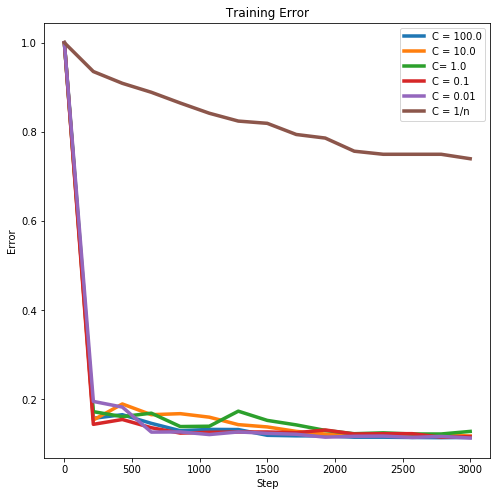

In [6]:
# training error plot
plot_dilation = 200
plt.figure(figsize=(8, 8))
plot_iters = 3000

error_plot(smo_model_100.w_ls[:plot_iters], 1.0, train_vectors, train_labels, 'SMO C = 100.0', plot_dilation)
error_plot(smo_model_10.w_ls[:plot_iters], 1.0, train_vectors, train_labels, 'SMO C = 10.0', plot_dilation)
error_plot(smo_model_1.w_ls[:plot_iters], 1.0, train_vectors, train_labels, 'SMO C= 1.0', plot_dilation)
error_plot(smo_model_01.w_ls[:plot_iters], 1.0, train_vectors, train_labels, 'SMO C = 0.1', plot_dilation)
error_plot(smo_model_001.w_ls[:plot_iters], 1.0, train_vectors, train_labels, 'SMO C = 0.01', plot_dilation)
error_plot(smo_model_0n.w_ls[:plot_iters], 1.0, train_vectors, train_labels, 'SMO C = 1/n', plot_dilation)

plt.title(' Training Error ')
plt.legend(['C = 100.0', 'C = 10.0', 'C= 1.0', 'C = 0.1', 'C = 0.01', 'C = 1/n'])

SMO C = 100.0 acc: 0.9807970090916815
SMO C = 10.0 acc: 0.9788427224063216
SMO C= 1.0 acc: 0.9763786218030419
SMO C = 0.1 acc: 0.9832611096949614
SMO C = 0.01 acc: 0.9835160166539213
SMO C = 1/n acc: 0.9770583736936018


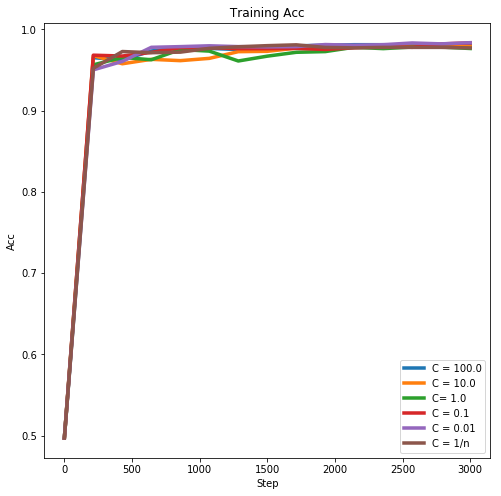

In [7]:
# training acc plot
plt.figure(figsize=(8, 8))
acc_plot(smo_model_100.w_ls[:plot_iters], train_vectors, train_labels, 'SMO C = 100.0', plot_dilation)
acc_plot(smo_model_10.w_ls[:plot_iters], train_vectors, train_labels, 'SMO C = 10.0', plot_dilation)
acc_plot(smo_model_1.w_ls[:plot_iters], train_vectors, train_labels, 'SMO C= 1.0', plot_dilation)
acc_plot(smo_model_01.w_ls[:plot_iters], train_vectors, train_labels, 'SMO C = 0.1', plot_dilation)
acc_plot(smo_model_001.w_ls[:plot_iters], train_vectors, train_labels, 'SMO C = 0.01', plot_dilation)
acc_plot(smo_model_0n.w_ls[:plot_iters], train_vectors, train_labels, 'SMO C = 1/n', plot_dilation)

plt.title(' Training Acc ')
plt.legend(['C = 100.0', 'C = 10.0', 'C= 1.0', 'C = 0.1', 'C = 0.01', 'C = 1/n'])

SMO error: 0.1212691395292575
SMO error: 0.11620327924481734
SMO error: 0.12445598335459428
SMO error: 0.11987664739851832
SMO error: 0.11391292022314903
SMO error: 0.732761496963111


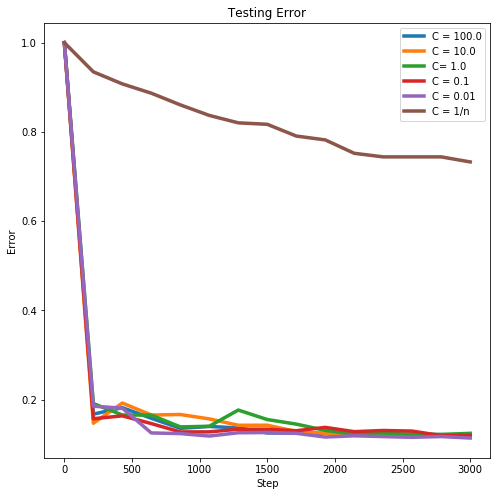

In [8]:
# test error plot
plt.figure(figsize=(8, 8))
error_plot(smo_model_100.w_ls[:plot_iters], 1.0, val_vectors, val_labels, 'SMO', plot_dilation)
error_plot(smo_model_10.w_ls[:plot_iters], 1.0, val_vectors, val_labels, 'SMO', plot_dilation)
error_plot(smo_model_1.w_ls[:plot_iters], 1.0, val_vectors, val_labels, 'SMO', plot_dilation)
error_plot(smo_model_01.w_ls[:plot_iters], 1.0, val_vectors, val_labels, 'SMO', plot_dilation)
error_plot(smo_model_001.w_ls[:plot_iters], 1.0, val_vectors, val_labels, 'SMO', plot_dilation)
error_plot(smo_model_0n.w_ls[:plot_iters], 1.0, val_vectors, val_labels, 'SMO', plot_dilation)

plt.title(' Testing Error ')
plt.legend(['C = 100.0', 'C = 10.0', 'C= 1.0', 'C = 0.1', 'C = 0.01', 'C = 1/n'])

SMO acc: 0.9756728778467909
SMO acc: 0.9761904761904762
SMO acc: 0.9772256728778468
SMO acc: 0.977743271221532
SMO acc: 0.9829192546583851
SMO acc: 0.9756728778467909


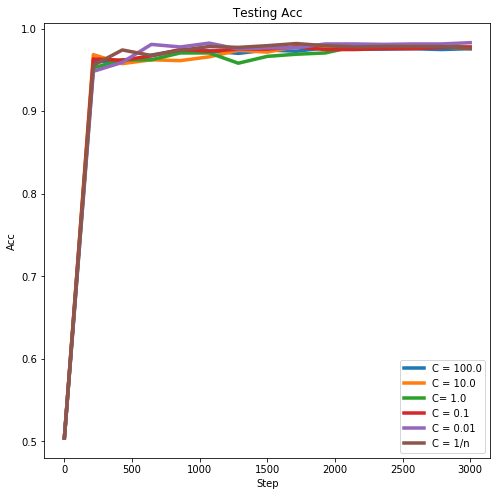

In [9]:
# test acc plot
plt.figure(figsize=(8, 8))
acc_plot(smo_model_100.w_ls[:plot_iters], val_vectors, val_labels, 'SMO', plot_dilation)
acc_plot(smo_model_10.w_ls[:plot_iters], val_vectors, val_labels, 'SMO', plot_dilation)
acc_plot(smo_model_1.w_ls[:plot_iters], val_vectors, val_labels, 'SMO', plot_dilation)
acc_plot(smo_model_01.w_ls[:plot_iters], val_vectors, val_labels, 'SMO', plot_dilation)
acc_plot(smo_model_001.w_ls[:plot_iters], val_vectors, val_labels, 'SMO', plot_dilation)
acc_plot(smo_model_0n.w_ls[:plot_iters], val_vectors, val_labels, 'SMO', plot_dilation)

plt.title(' Testing Acc ')
plt.legend(['C = 100.0', 'C = 10.0', 'C= 1.0', 'C = 0.1', 'C = 0.01', 'C = 1/n'])

In [12]:
# Cifar
folder = 'dataset/cifar/'
train_vectors, train_labels, val_vectors, val_labels, label_names = get_cifar10(folder)
num_examples, num_features = train_vectors.shape

(10000, 3072)
(10000, 3072) (10000,) (2000, 3072) (2000,)


In [13]:
# SMO descend with C=100.0
smo_model_100 = SMO(C=100.0)
smo_model_100.fit(train_vectors, train_labels)

# SMO descend with C=10.0
smo_model_10 = SMO(C=10.0)
smo_model_10.fit(train_vectors, train_labels)

# SMO descend with C=1.0
smo_model_1 = SMO(C=1.0)
smo_model_1.fit(train_vectors, train_labels)

# SMO descend with C=0.1
smo_model_01 = SMO(C=0.1)
smo_model_01.fit(train_vectors, train_labels)

# SMO descend with C=0.01
smo_model_001 = SMO(C=0.01)
smo_model_001.fit(train_vectors, train_labels)

# SMO descend with C=1/n
smo_model_0n = SMO(C=1.0 / train_vectors.shape[0])
smo_model_0n.fit(train_vectors, train_labels)

SMO training start
SMO training ends....
SMO training start
SMO training ends....
SMO training start
SMO training ends....
SMO training start
SMO training ends....
SMO training start
SMO training ends....
SMO training start
SMO training ends....


SMO error: 0.5034133054190663
SMO error: 0.522004656684218
SMO error: 0.5546305334160868
SMO error: 0.487844704189988
SMO error: 0.5088122449045918
SMO error: 0.4582820828635032


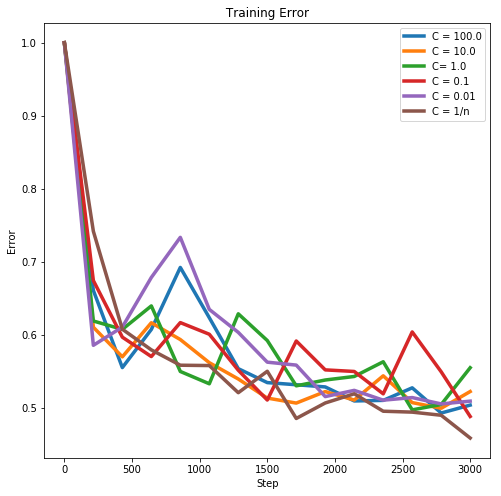

In [14]:
# training error plot
plot_dilation = 200
plt.figure(figsize=(8, 8))
plot_iters = 3000

error_plot(smo_model_100.w_ls[:plot_iters], 1.0, train_vectors, train_labels, 'SMO', plot_dilation)
error_plot(smo_model_10.w_ls[:plot_iters], 1.0, train_vectors, train_labels, 'SMO', plot_dilation)
error_plot(smo_model_1.w_ls[:plot_iters], 1.0, train_vectors, train_labels, 'SMO', plot_dilation)
error_plot(smo_model_01.w_ls[:plot_iters], 1.0, train_vectors, train_labels, 'SMO', plot_dilation)
error_plot(smo_model_001.w_ls[:plot_iters], 1.0, train_vectors, train_labels, 'SMO', plot_dilation)
error_plot(smo_model_0n.w_ls[:plot_iters], 1.0, train_vectors, train_labels, 'SMO', plot_dilation)

plt.title(' Training Error ')
plt.legend(['C = 100.0', 'C = 10.0', 'C= 1.0', 'C = 0.1', 'C = 0.01', 'C = 1/n'])

SMO acc: 0.8204
SMO acc: 0.8144
SMO acc: 0.799
SMO acc: 0.8271
SMO acc: 0.8161
SMO acc: 0.82


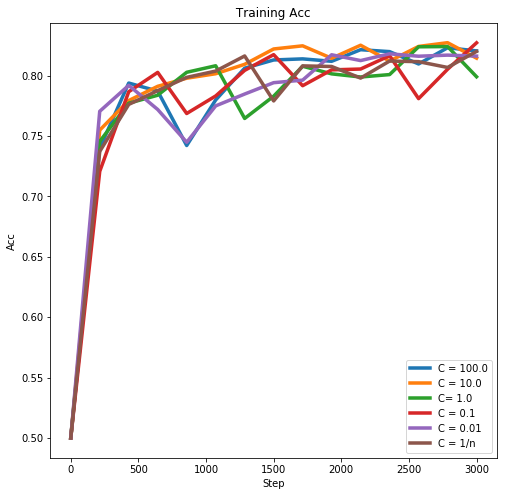

In [15]:
# training acc plot
plt.figure(figsize=(8, 8))
acc_plot(smo_model_100.w_ls[:plot_iters], train_vectors, train_labels, 'SMO', plot_dilation)
acc_plot(smo_model_10.w_ls[:plot_iters], train_vectors, train_labels, 'SMO', plot_dilation)
acc_plot(smo_model_1.w_ls[:plot_iters], train_vectors, train_labels, 'SMO', plot_dilation)
acc_plot(smo_model_01.w_ls[:plot_iters], train_vectors, train_labels, 'SMO', plot_dilation)
acc_plot(smo_model_001.w_ls[:plot_iters], train_vectors, train_labels, 'SMO', plot_dilation)
acc_plot(smo_model_0n.w_ls[:plot_iters], train_vectors, train_labels, 'SMO', plot_dilation)

plt.title(' Training Acc ')
plt.legend(['C = 100.0', 'C = 10.0', 'C= 1.0', 'C = 0.1', 'C = 0.01', 'C = 1/n'])

SMO error: 0.5360631477531337
SMO error: 0.5464003272366357
SMO error: 0.5802644702479695
SMO error: 0.4958996845870329
SMO error: 0.528091534812077
SMO error: 0.4752294294962004


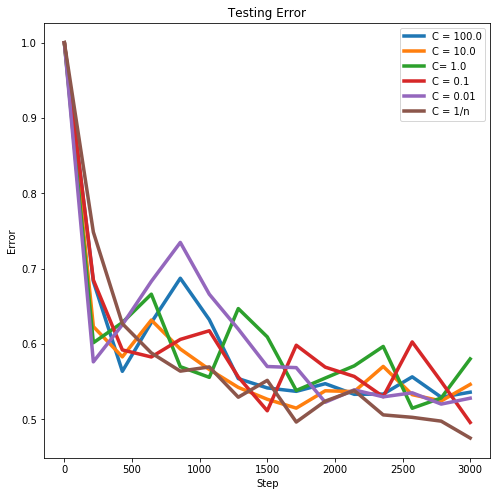

In [16]:
# test error plot
plt.figure(figsize=(8, 8))
error_plot(smo_model_100.w_ls[:plot_iters], 1.0, val_vectors, val_labels, 'SMO', plot_dilation)
error_plot(smo_model_10.w_ls[:plot_iters], 1.0, val_vectors, val_labels, 'SMO', plot_dilation)
error_plot(smo_model_1.w_ls[:plot_iters], 1.0, val_vectors, val_labels, 'SMO', plot_dilation)
error_plot(smo_model_01.w_ls[:plot_iters], 1.0, val_vectors, val_labels, 'SMO', plot_dilation)
error_plot(smo_model_001.w_ls[:plot_iters], 1.0, val_vectors, val_labels, 'SMO', plot_dilation)
error_plot(smo_model_0n.w_ls[:plot_iters], 1.0, val_vectors, val_labels, 'SMO', plot_dilation)

plt.title(' Testing Error ')
plt.legend(['C = 100.0', 'C = 10.0', 'C= 1.0', 'C = 0.1', 'C = 0.01', 'C = 1/n'])

SMO acc: 0.8065
SMO acc: 0.807
SMO acc: 0.7935
SMO acc: 0.823
SMO acc: 0.8075
SMO acc: 0.808


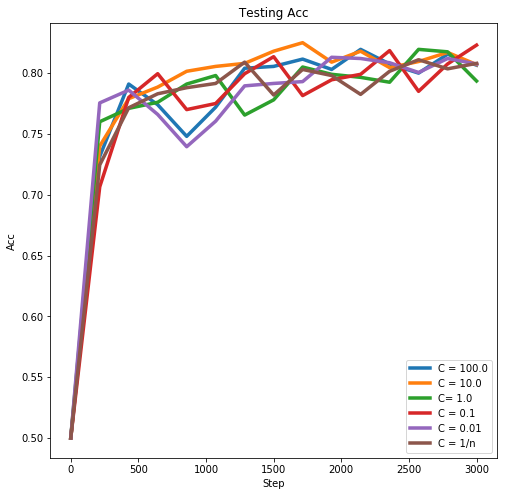

In [17]:
# test acc plot
plt.figure(figsize=(8, 8))
acc_plot(smo_model_100.w_ls[:plot_iters], val_vectors, val_labels, 'SMO', plot_dilation)
acc_plot(smo_model_10.w_ls[:plot_iters], val_vectors, val_labels, 'SMO', plot_dilation)
acc_plot(smo_model_1.w_ls[:plot_iters], val_vectors, val_labels, 'SMO', plot_dilation)
acc_plot(smo_model_01.w_ls[:plot_iters], val_vectors, val_labels, 'SMO', plot_dilation)
acc_plot(smo_model_001.w_ls[:plot_iters], val_vectors, val_labels, 'SMO', plot_dilation)
acc_plot(smo_model_0n.w_ls[:plot_iters], val_vectors, val_labels, 'SMO', plot_dilation)

plt.title(' Testing Acc ')
plt.legend(['C = 100.0', 'C = 10.0', 'C= 1.0', 'C = 0.1', 'C = 0.01', 'C = 1/n'])